In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

In [6]:
mall_customers_info = pd.read_csv("mall-customers/Mall_Customers.csv")
mall_customers_info.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
mall_customers_info.shape

(200, 5)

In [8]:
# check if it has any missing values
mall_customers_info.isnull().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [9]:
# check number of unique values in a data set
mall_customers_info.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

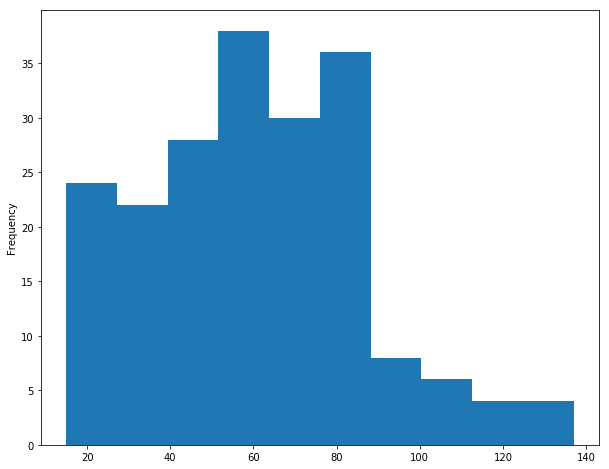

In [12]:
# plot a histogram of the data for each features to check for any outlier: a simple techniques to quickly check for outliers
mall_customers_info['Annual Income (k$)'].plot.hist(bins=10, figsize=(10,8));

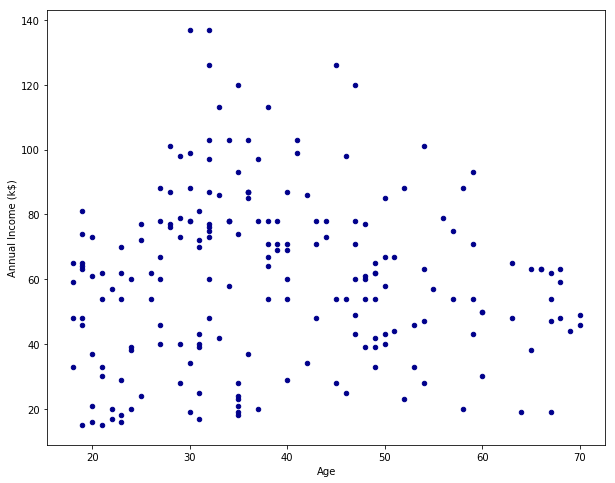

In [13]:
# visualizaton of bivariate relationships that occurs between two data
# in this case let's use Age and AnnualIncome features
mall_customers_info.plot.scatter(x='Age',
                                y='Annual Income (k$)',
                                c='DarkBlue',
                                figsize=(10,8));

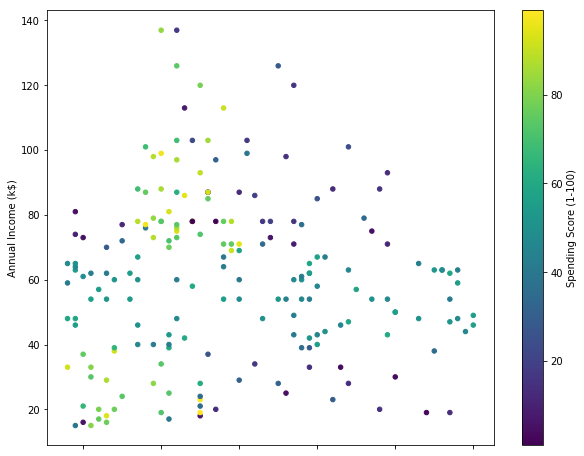

In [15]:
mall_customers_info.plot.scatter(x='Age',
                                y='Annual Income (k$)',
                                c='Spending Score (1-100)',
                                colormap='viridis',
                                figsize=(10,8));

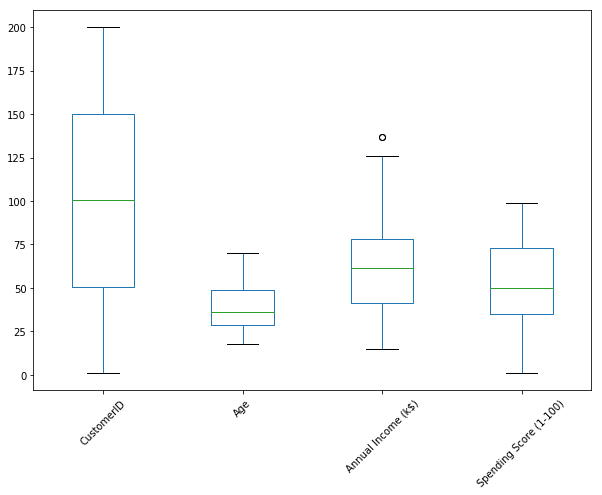

In [16]:
# boxplot is very good for outlier visualization
boxplot = mall_customers_info.boxplot(grid=False, rot=45, figsize=(10,7));

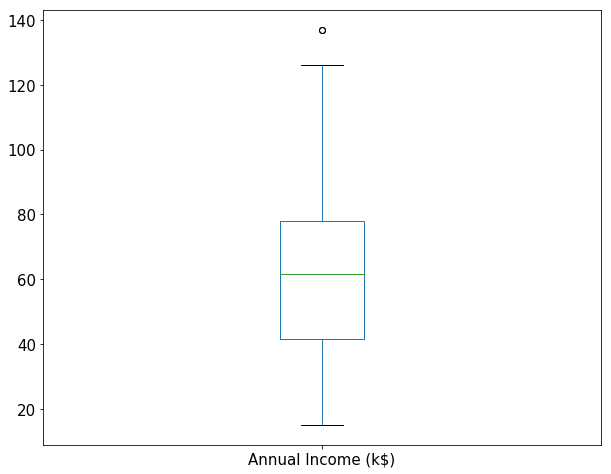

In [18]:
# boxplot for a specific column
boxplot = mall_customers_info.boxplot(grid=False,fontsize=15,
                                     column=['Annual Income (k$)'],
                                     figsize=(10,8));

In [19]:
# the data above the top horizontal line are the outliers which is around 125
# let's filter them
mall_customers_info.loc[mall_customers_info['Annual Income (k$)'] > 125]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [20]:
# check the data at some percentiles
Q1 = mall_customers_info['Annual Income (k$)'].quantile(0.25)
Q3 = mall_customers_info['Annual Income (k$)'].quantile(0.75)

print(Q1,Q3)

41.5 78.0


In [21]:
# check the Interquatile range
IQR = Q3-Q1

In [22]:
# use the IQR ro identify the outliers in the data
# create a new column
mall_customers_info['Annual_Income_Outlier'] = False

In [23]:
# define the otlier cut off
Q1 + 1.5 * IQR

96.25

In [24]:
# loop through the data and detect some otliers
for index, row in mall_customers_info.iterrows():
    
    if row['Annual Income (k$)'] > (Q1 + 1.5 * IQR):
        mall_customers_info.at[index, 'Annual_Income_Outlier'] = True 

In [25]:
# check the number of detected outliers
mall_customers_info['Annual_Income_Outlier'].sum()

20

In [26]:
# check the non outliers
non_outliers = mall_customers_info.loc[mall_customers_info['Annual_Income_Outlier'] == False]

non_outliers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outlier
0,1,Male,19,15,39,False
1,2,Male,21,15,81,False
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


In [27]:
# calculate the mean annual income from the non outliers data
mean = non_outliers['Annual Income (k$)'].mean()
mean

55.1

In [28]:
# use the mean to fill in all the outliers data
for index, row in mall_customers_info.iterrows():
    
    if row['Annual_Income_Outlier'] == True:
        mall_customers_info.at[index, 'Annual Income (k$)'] = mean

In [30]:
# check for 5 samples
mall_customers_info.sample(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual_Income_Outlier
169,170,Male,32,87,63,False
79,80,Female,49,54,42,False
85,86,Male,48,54,46,False
122,123,Female,40,69,58,False
194,195,Female,47,55,16,True


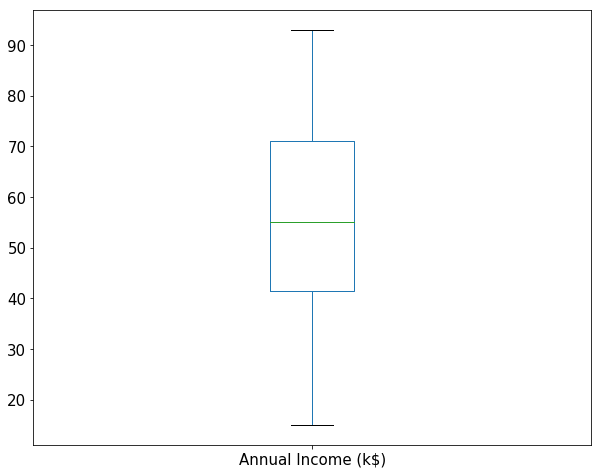

In [31]:
# replot the boxplot to affirm there is no outliers again
boxplot = mall_customers_info.boxplot(grid=False, fontsize=15,
                                     column=['Annual Income (k$)'], figsize=(10,8));